In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

\begin{align}
        p(\textbf{z}|c) &= \mathcal{C}_d(\kappa)\exp\left(\kappa\mu^T_{c}\textbf{z}\right)\\
        \mathcal{C}_d(\kappa) &= \frac{(\kappa)^{d/2-1}}{(2\pi)^{d/2}\mathcal{I}_{d/2-1}(\kappa)}
\end{align}

With d=2:

In [2]:
from scipy.special import iv
def z_Prob(z, mus, kappa, d=2, beta=0.5):
    K = mus.shape[-1]
    p_c = (1 - beta) / K
    class_probs = np.array([z_vonMises_dencity(z, mu, kappa) for mu in mus.T])
    return np.sum(class_probs * p_c) + (1 / (2 * np.pi))*beta
def z_class_prob(class_id, z, mus, kappa, d=2, beta=0.5):
    p_z = z_Prob(z, mus, kappa, d, beta)
    K = mus.shape[1]
    if class_id == K:
        p_c = beta
        return (1 / (2 * np.pi))*p_c / p_z
    else:
        p_c = (1 - beta) / K
        return (z_vonMises_dencity(z, mus[:, class_id], kappa) * p_c) / p_z
def z_vonMises_dencity(z, mu_c, kappa, d=2):
    C_d = kappa**(d/2-1) / ((2*np.pi)**(d/2)*iv(d/2-1, kappa))
    return C_d * np.exp(kappa * np.dot(z, mu_c))

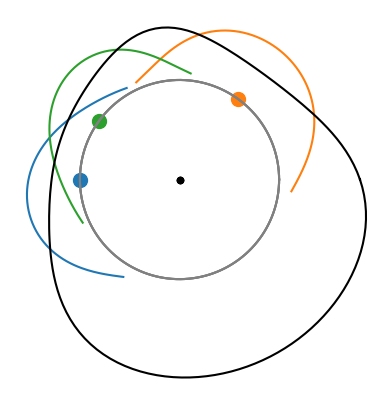

In [3]:
gallery_class_angles = [0.5, 0.15, 0.4]
theta = np.linspace(0, 2*np.pi, 150)
a = np.cos(theta)
b = np.sin(theta) 
kappa = 5
beta = 0.5

colors = list(mcolors.TABLEAU_COLORS)[:len(gallery_class_angles)]
plt.figure(figsize=(5, 5))
draw_dencity_angles = np.linspace(-np.pi/3, np.pi/3, 150)
gallery_class_angles = np.array(gallery_class_angles) * 2*np.pi
mus = np.stack([np.cos(gallery_class_angles), np.sin(gallery_class_angles)], axis=0)
class_to_class_probs = []
for i, (angle, color) in enumerate(zip(gallery_class_angles, colors)):
    mu_c = mus[:,i]
    plot_angles = angle + draw_dencity_angles
    class_probes = []
    zs = []
    for plot_angle in plot_angles:
        z = [np.cos(plot_angle), np.sin(plot_angle)]
        zs.append(z)
        class_prob = z_class_prob(i, z, mus, kappa, beta=beta)
        class_probes.append(class_prob)
    class_probes = np.array(class_probes)
    zs = np.array(zs)
    v = zs.T * (1 + class_probes[np.newaxis, :])
    plt.plot(v[0], v[1], c=color)
    plt.plot(a, b, color='gray')
    plt.scatter([np.cos(angle)], [np.sin(angle)], c=color, s=100)
    plt.scatter([0], [0], color='black', s=20)

    # plot decity
    #plt.scatter(points[:, 0], points[:, 1], color=color, s=3)

# plot_uniform_prob
zs = []
class_probes = []

for plot_angle in theta:
    sum_prob = 0
    z = [np.cos(plot_angle), np.sin(plot_angle)]
    zs.append(z)
    class_prob = z_class_prob(mus.shape[1], z, mus, kappa, beta=beta)
    class_probes.append(class_prob)
    sum_prob+=class_prob
    for i in range(mus.shape[1]):
        sum_prob+=z_class_prob(i, z, mus, kappa, beta=beta)
class_probes = np.array(class_probes)
class_to_class_probs.append(class_probes)
zs = np.array(zs)
v = zs.T * (1 + class_probes[np.newaxis, :])
plt.plot(v[0], v[1], color='black')

plt.gca().set_aspect("equal")
plt.axis("off")
plt.show()
#plt.savefig('1.png')

In [4]:
np.sum(np.stack(class_to_class_probs, axis=0), axis=0)

array([0.81200413, 0.78503646, 0.75638066, 0.72639453, 0.69549736,
       0.66414724, 0.63281534, 0.60196046, 0.57200657, 0.54332579,
       0.51622778, 0.49095552, 0.46768693, 0.44654058, 0.42758434,
       0.41084531, 0.39631997, 0.38398365, 0.37379889, 0.36572225,
       0.35970965, 0.35572003, 0.35371754, 0.35367216, 0.35555874,
       0.35935436, 0.36503381, 0.372563  , 0.38188995, 0.39293321,
       0.40556772, 0.41960858, 0.43479367, 0.45076743, 0.46706905,
       0.48312953, 0.49828295, 0.51179642, 0.5229208 , 0.53095916,
       0.53534434, 0.53571091, 0.53194549, 0.52420269, 0.51288217,
       0.49857276, 0.48197723, 0.46383405, 0.44485021, 0.42565299,
       0.40676287, 0.38858479, 0.37141297, 0.35544399, 0.34079352,
       0.32751379, 0.3156096 , 0.30505219, 0.29579051, 0.2877602 ,
       0.28089051, 0.27510964, 0.27034873, 0.26654507, 0.26364443,
       0.26160301, 0.26038886, 0.25998297, 0.26037997, 0.26158855,
       0.26363147, 0.26654542, 0.27038044, 0.2751993 , 0.28107

In [5]:
f

NameError: name 'f' is not defined

In [ ]:
gallery_class_angles

array([124.02510672,  62.01255336,  99.22008538])

In [ ]:
np.cos(gallery_class_angles)

array([-0.06775116,  0.68273305,  0.25700014])

In [ ]:
mus

array([[-0.06775116,  0.68273305,  0.25700014],
       [-0.99770225, -0.7306679 , -0.96641137]])

In [ ]:
mus[i]

array([ 0.62968173, -0.90268536, -0.99652392])

In [ ]:
mu_c

-1.0

In [ ]:
class_probes[0]

0.15926748261265755

In [ ]:
1 / (2*np.pi)

0.15915494309189535

In [ ]:
zs.shape

(150, 2)

In [ ]:
v[0]

array([-0.97121129, -0.97733757, -0.9836259 , -0.99007651, -0.99668938,
       -1.0034642 , -1.01040037, -1.01749702, -1.02475294, -1.03216661,
       -1.0397362 , -1.04745951, -1.05533399, -1.06335675, -1.07152453,
       -1.07983366, -1.08828014, -1.09685954, -1.10556705, -1.11439746,
       -1.12334517, -1.13240417, -1.14156804, -1.15082996, -1.16018271,
       -1.16961869, -1.17912988, -1.18870789, -1.19834393, -1.20802886,
       -1.21775316, -1.22750698, -1.23728011, -1.24706202, -1.2568419 ,
       -1.26660861, -1.27635077, -1.28605672, -1.2957146 , -1.30531232,
       -1.31483762, -1.32427806, -1.33362111, -1.34285409, -1.35196426,
       -1.36093885, -1.36976505, -1.37843008, -1.38692118, -1.3952257 ,
       -1.40333108, -1.4112249 , -1.41889493, -1.42632912, -1.43351569,
       -1.44044311, -1.44710018, -1.453476  , -1.45956007, -1.46534227,
       -1.4708129 , -1.47596274, -1.48078303, -1.48526554, -1.48940253,
       -1.49318688, -1.49661199, -1.49967189, -1.50236122, -1.50

In [ ]:
v[1]

array([0.70562631, 0.71007731, 0.71464605, 0.71933269, 0.72413722,
       0.72905941, 0.73409884, 0.73925486, 0.74452659, 0.74991294,
       0.75541257, 0.76102388, 0.76674503, 0.7725739 , 0.77850814,
       0.78454508, 0.7906818 , 0.7969151 , 0.80324148, 0.80965715,
       0.81615804, 0.82273979, 0.82939773, 0.83612691, 0.84292208,
       0.84977772, 0.85668801, 0.86364683, 0.87064783, 0.87768434,
       0.88474946, 0.89183602, 0.89893662, 0.9060436 , 0.91314909,
       0.92024502, 0.92732311, 0.9343749 , 0.94139176, 0.94836491,
       0.95528545, 0.96214433, 0.96893245, 0.9756406 , 0.98225953,
       0.98877996, 0.99519257, 1.00148807, 1.00765722, 1.01369081,
       1.01957971, 1.02531491, 1.03088751, 1.03628876, 1.04151011,
       1.04654318, 1.05137982, 1.05601213, 1.06043246, 1.06463347,
       1.06860812, 1.0723497 , 1.07585185, 1.07910858, 1.08211428,
       1.08486377, 1.08735226, 1.08957541, 1.09152932, 1.09321056,
       1.09461617, 1.09574366, 1.09659103, 1.09715678, 1.09743

In [ ]:
class_probes

array([0.20048318, 0.20048318, 0.20048318, 0.20048318, 0.20048318,
       0.20048318, 0.20048318, 0.20048318, 0.20048318, 0.20048318,
       0.20048318, 0.20048318, 0.20048318, 0.20048318, 0.20048318,
       0.20048318, 0.20048318, 0.20048318, 0.20048318, 0.20048318,
       0.20048318, 0.20048318, 0.20048318, 0.20048318, 0.20048318,
       0.20048318, 0.20048318, 0.20048318, 0.20048318, 0.20048318,
       0.20048318, 0.20048318, 0.20048318, 0.20048318, 0.20048318,
       0.20048318, 0.20048318, 0.20048318, 0.20048318, 0.20048318,
       0.20048318, 0.20048318, 0.20048318, 0.20048318, 0.20048318,
       0.20048318, 0.20048318, 0.20048318, 0.20048318, 0.20048318,
       0.20048318, 0.20048318, 0.20048318, 0.20048318, 0.20048318,
       0.20048318, 0.20048318, 0.20048318, 0.20048318, 0.20048318,
       0.20048318, 0.20048318, 0.20048318, 0.20048318, 0.20048318,
       0.20048318, 0.20048318, 0.20048318, 0.20048318, 0.20048318,
       0.20048318, 0.20048318, 0.20048318, 0.20048318, 0.20048

In [ ]:
v[0]

array([-0.97121129, -0.97121129, -0.97121129, -0.97121129, -0.97121129,
       -0.97121129, -0.97121129, -0.97121129, -0.97121129, -0.97121129,
       -0.97121129, -0.97121129, -0.97121129, -0.97121129, -0.97121129,
       -0.97121129, -0.97121129, -0.97121129, -0.97121129, -0.97121129,
       -0.97121129, -0.97121129, -0.97121129, -0.97121129, -0.97121129,
       -0.97121129, -0.97121129, -0.97121129, -0.97121129, -0.97121129,
       -0.97121129, -0.97121129, -0.97121129, -0.97121129, -0.97121129,
       -0.97121129, -0.97121129, -0.97121129, -0.97121129, -0.97121129,
       -0.97121129, -0.97121129, -0.97121129, -0.97121129, -0.97121129,
       -0.97121129, -0.97121129, -0.97121129, -0.97121129, -0.97121129,
       -0.97121129, -0.97121129, -0.97121129, -0.97121129, -0.97121129,
       -0.97121129, -0.97121129, -0.97121129, -0.97121129, -0.97121129,
       -0.97121129, -0.97121129, -0.97121129, -0.97121129, -0.97121129,
       -0.97121129, -0.97121129, -0.97121129, -0.97121129, -0.97

In [ ]:
x

[0, -0.8090169943749473]